In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


In [47]:
data = pd.read_csv('/kaggle/input/device-prediction/train - train.csv')

In [48]:
data.shape

(2000, 21)

# Data Exploration

In [49]:
data.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


In [50]:
data.tail()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0.0,1.0,2.0,0.8,106.0,6.0,...,1222.0,1890.0,668.0,13.0,4.0,19,1,1,0,0
1996,1965,1,2.6,1,0.0,0.0,39.0,0.2,187.0,4.0,...,915.0,1965.0,2032.0,11.0,10.0,16,1,1,1,2
1997,1911,0,0.9,1,1.0,1.0,36.0,0.7,108.0,8.0,...,868.0,1632.0,3057.0,9.0,1.0,5,1,1,0,3
1998,1512,0,0.9,0,4.0,1.0,46.0,0.1,145.0,5.0,...,336.0,670.0,869.0,18.0,10.0,19,1,1,1,0
1999,510,1,2.0,1,5.0,1.0,45.0,0.9,168.0,6.0,...,483.0,754.0,3919.0,19.0,4.0,2,1,1,1,3


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1995 non-null   float64
 5   four_g         1995 non-null   float64
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   float64
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [52]:
data.nunique().sort_values()


blue                2
dual_sim            2
four_g              2
three_g             2
touch_screen        2
wifi                2
price_range         4
n_cores             8
m_dep              10
sc_h               15
sc_w               19
talk_time          19
fc                 20
pc                 21
clock_speed        26
int_memory         63
mobile_wt         121
battery_power    1094
px_width         1109
px_height        1135
ram              1561
dtype: int64

In [53]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               5
four_g           5
int_memory       5
m_dep            5
mobile_wt        4
n_cores          4
pc               5
px_height        4
px_width         2
ram              2
sc_h             1
sc_w             1
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [54]:
data.shape

(2000, 21)

In [55]:
display(data.describe())


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,1995.000000,1995.000000,1995.000000,1995.000000,1996.000000,1996.000000,...,1996.000000,1998.000000,1998.000000,1999.000000,1999.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.310276,0.521303,32.048120,0.502256,140.266533,4.518036,...,644.651804,1251.287788,2124.262262,12.303652,5.766383,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.335766,0.499671,18.146476,0.288530,35.384676,2.288946,...,443.355443,432.352930,1085.273372,4.212373,4.357400,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.000000,874.250000,1206.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3065.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [56]:
inf_mask = np.isinf(data)
inf_counts = inf_mask.sum()
print(inf_counts)

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [57]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Exploratory Data Analysis (EDA)


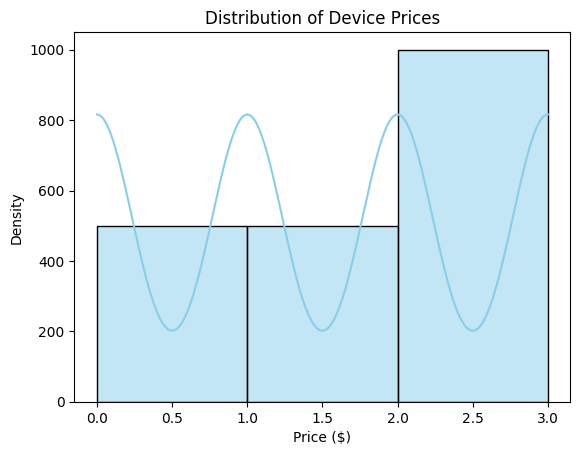

In [58]:
warnings.filterwarnings("ignore", category=FutureWarning)
device_prices = data['price_range'].values
bin_edges = np.arange(min(device_prices), max(device_prices) + 1, 1)  
sns.histplot(data['price_range'], kde=True, bins=bin_edges, color='skyblue', edgecolor='black')
plt.title('Distribution of Device Prices')
plt.xlabel('Price ($)')
plt.ylabel('Density')
plt.show()

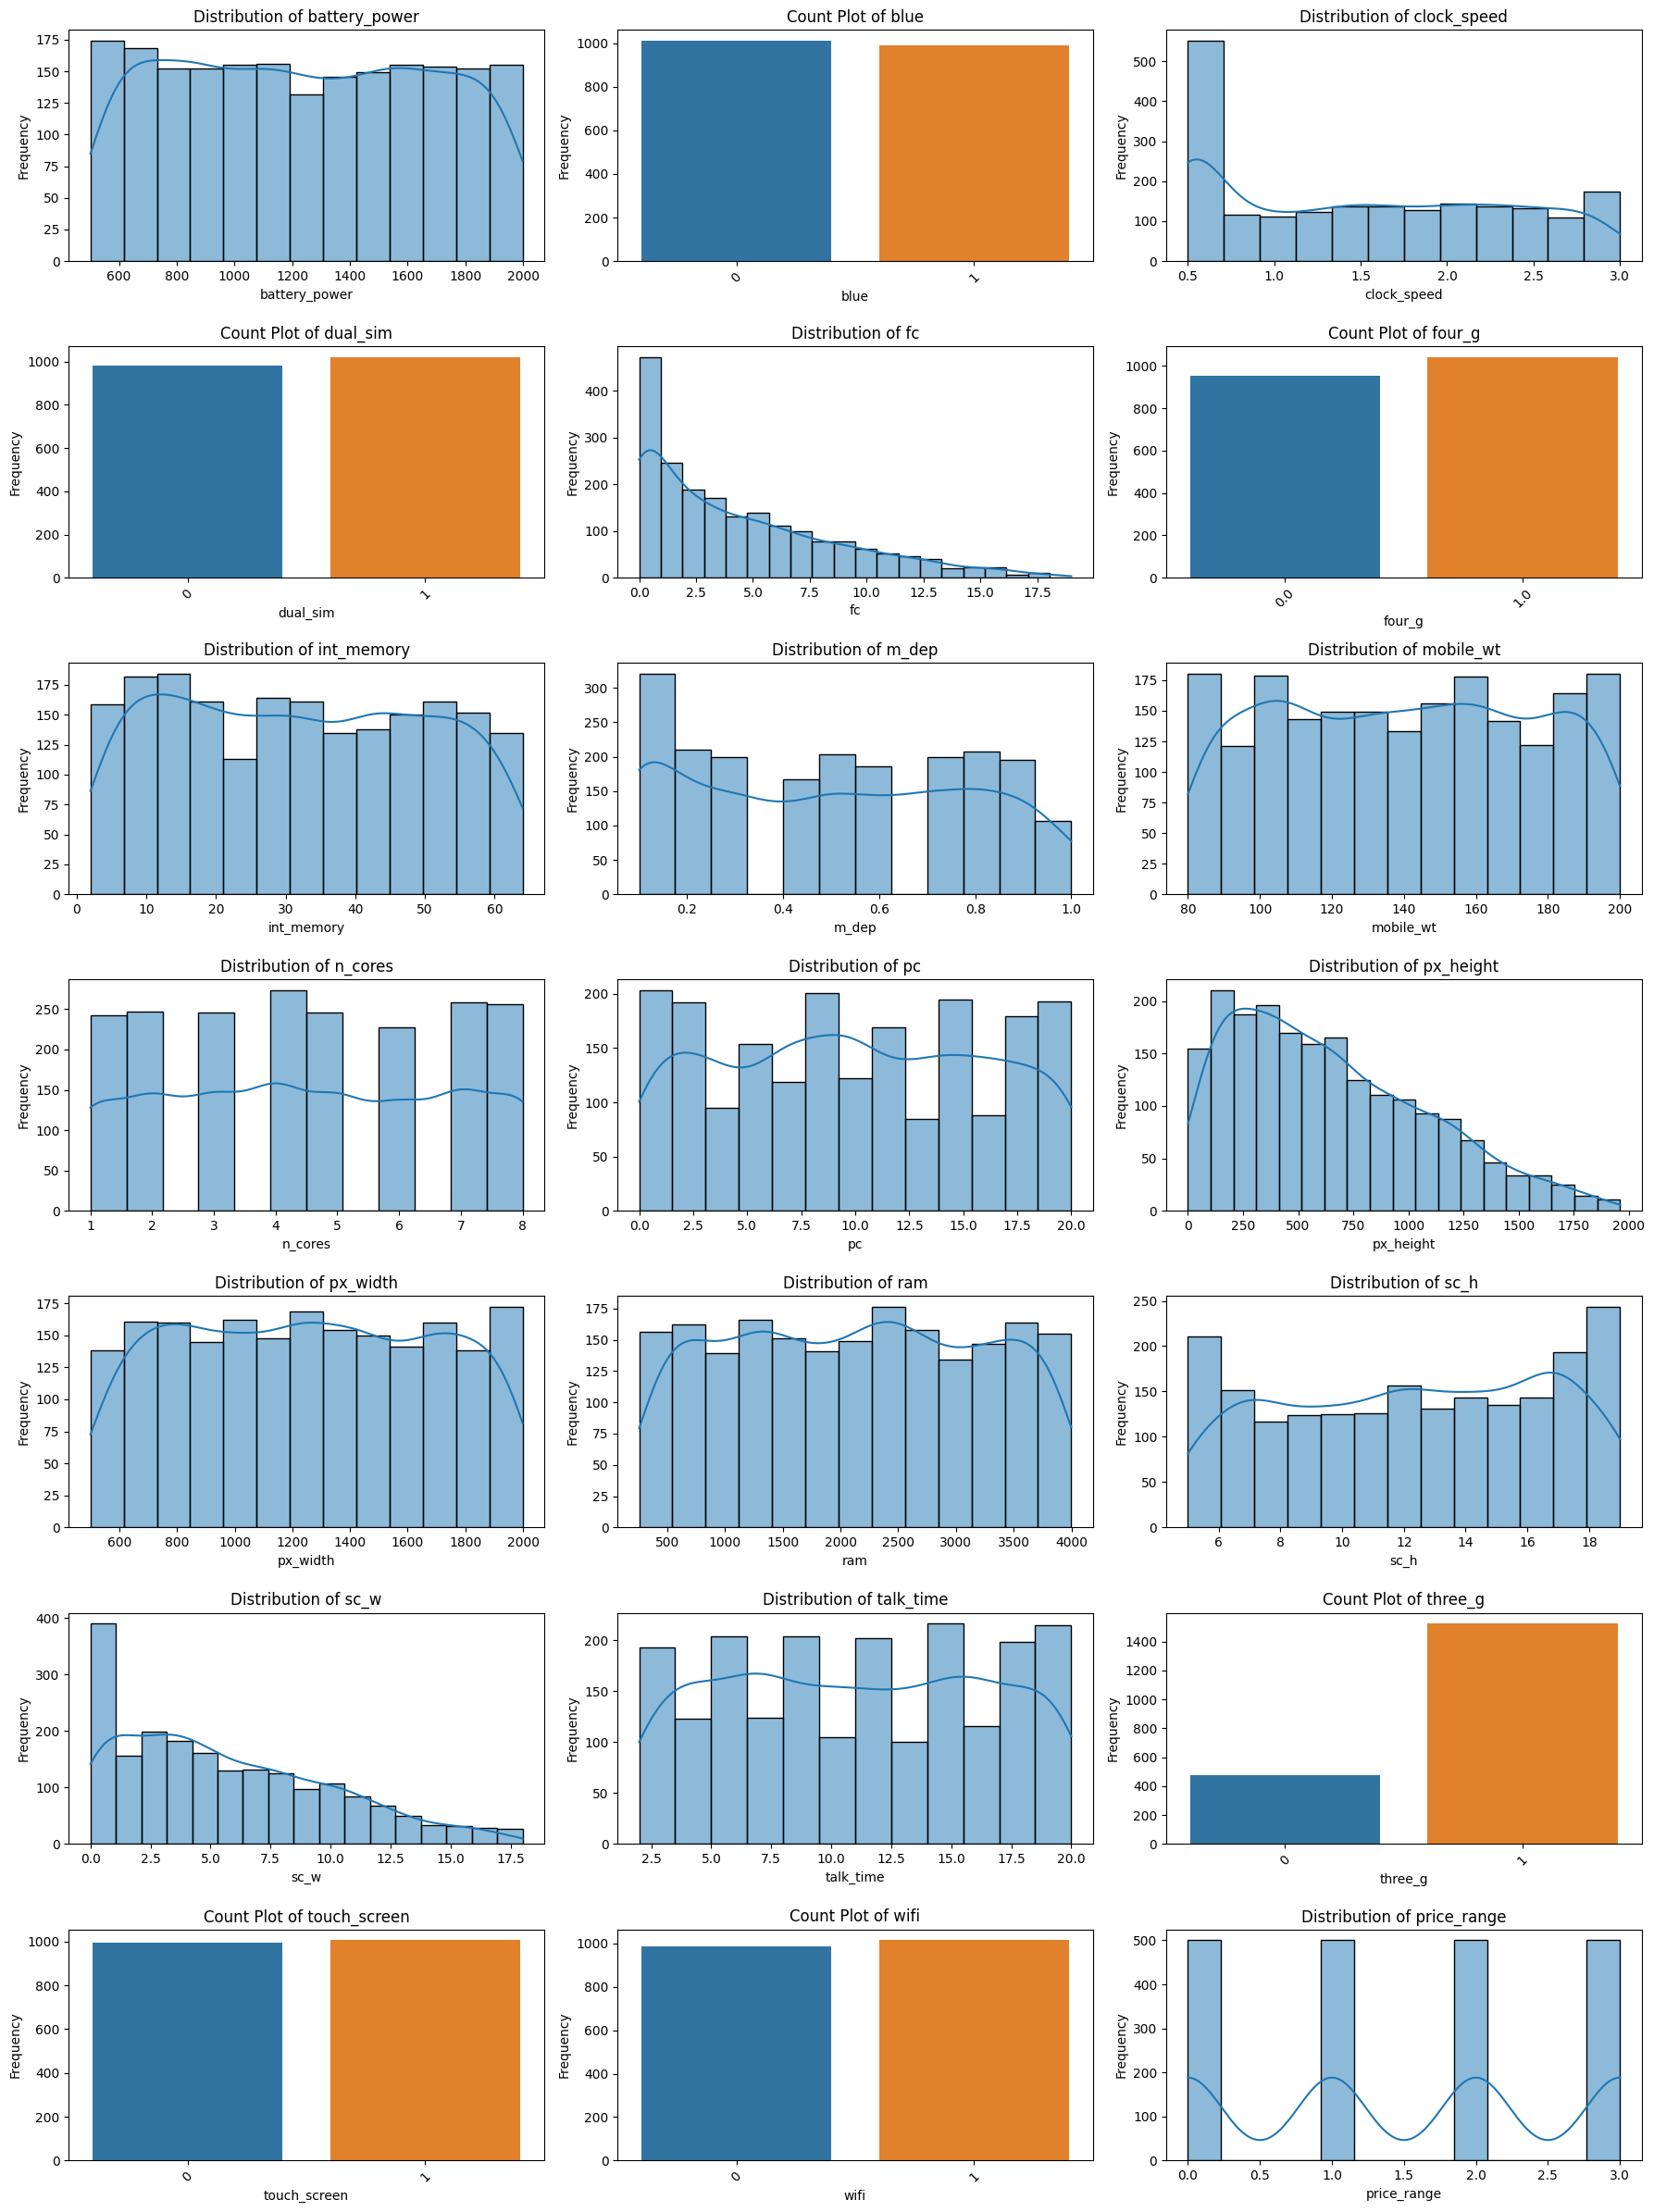

In [59]:
fig, axes = plt.subplots(7, 3, figsize=(18, 24))  # Adjust rows and columns based on your preference

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each column (feature) and create corresponding plots
warnings.filterwarnings("ignore", category=FutureWarning)


for i, col in enumerate(data.columns):
    if col != 'price':  # Skip target variable 'price'
        ax = axes[i]
        if data[col].dtype == 'object' or data[col].nunique() < 3:  # Categorical feature
            sns.countplot(x=col, data=data, ax=ax)
            ax.set_title(f'Count Plot of {col}')
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate x-axis labels if necessary
        else:  # Numerical feature
            sns.histplot(data[col], kde=True, ax=ax)
            ax.set_title(f'Distribution of {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')

# Adjust layout and spacing
plt.tight_layout()
plt.show()

In [60]:
# g = sns.pairplot(data)
# plt.title('Pairplots for all the Feature')
# g.map_upper(sns.kdeplot, levels=4, color=".2")
# plt.show()

# Data Preprocessing

### Removing duplicates

In [61]:
data.drop_duplicates(inplace=True)

### Checking NULL Values

In [62]:
data.isnull().sum().sort_values()


battery_power    0
blue             0
clock_speed      0
dual_sim         0
wifi             0
touch_screen     0
three_g          0
talk_time        0
price_range      0
sc_w             1
sc_h             1
ram              2
px_width         2
n_cores          4
mobile_wt        4
px_height        4
pc               5
four_g           5
int_memory       5
m_dep            5
fc               5
dtype: int64

In [63]:
data = data.dropna()

## Data Manipulation

#### Splitting data

In [64]:
X = data.drop(['price_range'],axis=1)
Y = data['price_range']

In [65]:
correlation_matrix = X.corrwith(Y)
correlation_matrix_abs = correlation_matrix.abs()  # Take absolute values of correlations
sorted_correlations = correlation_matrix_abs.sort_values(ascending=False)
sorted_correlations

ram              0.917448
battery_power    0.199277
px_width         0.163319
px_height        0.147956
int_memory       0.041812
sc_w             0.038371
pc               0.034716
mobile_wt        0.032168
touch_screen     0.030315
three_g          0.024896
fc               0.024738
sc_h             0.021643
blue             0.021330
talk_time        0.020511
wifi             0.019546
dual_sim         0.019108
four_g           0.015537
clock_speed      0.006675
n_cores          0.004662
m_dep            0.001396
dtype: float64

In [210]:
k = 4
top_features = sorted_correlations.index[:k]
selected_features = X[top_features]

In [211]:
train_X, test_X, train_Y, test_Y = train_test_split(selected_features, Y, train_size=0.9, test_size=0.1, random_state=100)

In [212]:
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly_train = poly_features.fit_transform(train_X)
X_poly_test = poly_features.transform(test_X)

In [213]:
std = StandardScaler()

In [214]:
train_X_std = std.fit_transform(X_poly_train)
# train_X_std = pd.DataFrame(train_X_std, columns=X_poly_train.columns)
# display(train_X_std.describe())

In [215]:
test_X_std = std.transform(X_poly_test)
# test_X_std = pd.DataFrame(test_X_std, columns=train_X.columns)
# display(test_X_std.describe())

### Feature extraction

#### Checking correlation on train data:

In [216]:
# plt.figure(figsize=[25,20])
# sns.heatmap(train_X_std.corr(), annot=True, vmin=-1, vmax=1, center=0) #cmap='BuGn'
# plt.show()

#### There are some large correlation between features

### Reducing High correlation using PCA

#### Determining the appropriate number of components:

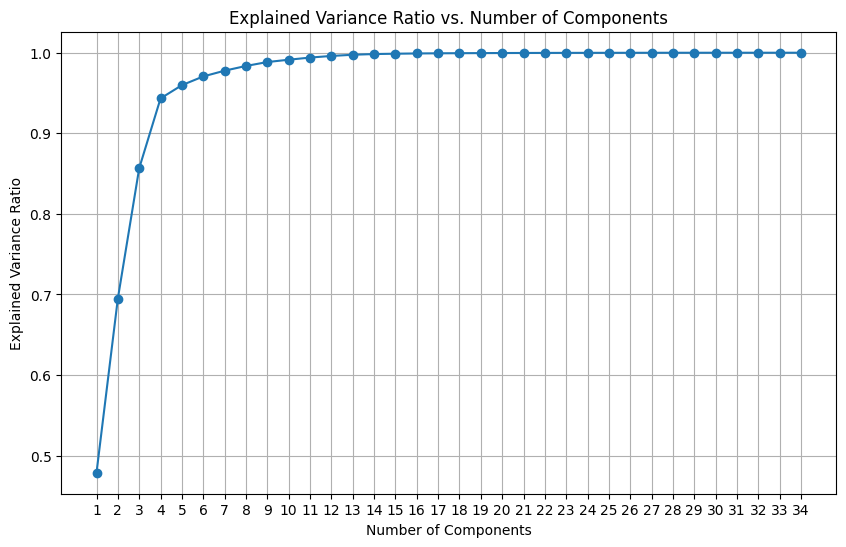

In [217]:
n_features = train_X_std.shape[1] 

n_components = range(1, n_features + 1)

explained_variances = []
for n in n_components:
    pca = PCA(n_components=n)
    pca.fit(train_X_std)
    explained_variances.append(sum(pca.explained_variance_ratio_))

plt.figure(figsize=(10, 6))
plt.plot(n_components, explained_variances, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.xticks(n_components)
plt.grid(True)
plt.show()

#### I have chose npca = 16 becuase the variance is greater than 90%

In [218]:
# n_components = 16
# pca = PCA(n_components) 
# train_X_pca = pca.fit_transform(train_X_std)
# train_X_pca = pd.DataFrame(data=train_X_pca, columns=[f"PC{i+1}" for i in range(n_components)])

In [219]:
# train_X_pca

In [220]:
# plt.figure(figsize=[25,20])
# sns.heatmap(train_X_pca.corr(), annot=True, vmin=-1, vmax=1, center=0) #cmap='BuGn'
# plt.show()

#### The large correlation values on train data are eliminated

### Applying the same transformation on test data:

In [221]:
# test_X_pca = pca.transform(test_X_std)
# test_X_pca = pd.DataFrame(data=test_X_pca, columns=[f"PC{i+1}" for i in range(n_components)])

In [222]:
# plt.figure(figsize=[25,20])
# sns.heatmap(test_X_pca.corr(), annot=True, vmin=-1, vmax=1, center=0) #cmap='BuGn'
# plt.show()

In [223]:
# test_X_pca

## Fitting Linear regression Model:

In [224]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score


model = LinearRegression()
model.fit(train_X_std, train_Y)

# Making predictions
y_pred = model.predict(test_X_std)

# Evaluating the model
mse = mean_squared_error(test_Y, y_pred)
r2 = r2_score(test_Y, y_pred)

In [225]:
r2

0.9453572740287352

In [226]:
svm_model = SVR(kernel='rbf')  # RBF kernel is commonly used for non-linear regression
svm_model.fit(train_X_std, train_Y)
y_pred = svm_model.predict(test_X_std)

# Evaluating the model
mse = mean_squared_error(test_Y, y_pred)
r2 = r2_score(test_Y, y_pred)

In [227]:
r2

0.9350090500794239

In [84]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1]}

grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5)
grid_search.fit(train_X_std, train_Y)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [85]:
best_model.fit(train_X_std, train_Y)
y_pred = best_model.predict(test_X_std)

# Evaluating the model
mse = mean_squared_error(test_Y, y_pred)
r2 = r2_score(test_Y, y_pred)

In [86]:
r2

0.9444564638252547

In [197]:
from sklearn.ensemble import GradientBoostingRegressor


In [228]:
gb_regressor = GradientBoostingRegressor(random_state=42)
gb_regressor.fit(train_X_std, train_Y)

GradientBoostingRegressor(random_state=42)

In [229]:
y_pred= gb_regressor.predict(test_X_std)
mse = mean_squared_error(test_Y, y_pred)
r2 = r2_score(test_Y, y_pred)
r2

0.9485234574693533

In [233]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

In [346]:
model = Sequential()

model.add(Dense(128, input_shape=(train_X_std.shape[1],), kernel_regularizer=l2(0.01)))
model.add(LeakyReLU(alpha=0.1)) 
model.add(Dropout(0.2)) 
model.add(Dense(64, kernel_regularizer=l2(0.01)))
model.add(LeakyReLU(alpha=0.1)) 
model.add(Dropout(0.2)) 
model.add(Dense(32,  kernel_regularizer=l2(0.01)))
model.add(LeakyReLU(alpha=0.1)) 
model.add(Dropout(0.2)) 
model.add(Dense(1, activation='linear'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [393]:
history = model.fit(train_X_std, train_Y, epochs=1, batch_size=32, validation_split=0.2, verbose=1)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0963 - mae: 0.2009 - val_loss: 0.0728 - val_mae: 0.1477


In [394]:
y_pred = model.predict(test_X_std)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [395]:
r2 = r2_score(test_Y, y_pred)


In [396]:
r2

0.9704722758649754

In [397]:
model.save('Device_price_prediction_model.h5')